# Pilot studies 1 + 2 mmgbsa

## Format the data appropriately for arsenic

In [5]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [9]:
def compute_binding_ddgs(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5

In [6]:
with open("mmgbsa_data.npy", "rb") as f:
    data = np.load(f)

In [7]:
titles = ["K417N", "E484K", "L452R", "N439K", "N501A", "N501V", "N501I", "N501L", "N501M", "N501F", "N501Y", "N501W", "N501S", "N501T", "N501Q", "N501C", "N501G", "N501R", "N501H", "N501K", "N501D", "N501E"]
dir_num = 15
# to_plot = ['# Calculated block', '# Mutant1, Mutant2, calc_DDG, calc_dDDG(BAR), calc_dDDG(additional)']
to_plot = []
for i, title in enumerate(titles):
    to_plot.append([titles[i][:-1], titles[i][-1] + titles[i][1:-1], data[i+1] - data[0], 0, 0])
        
        
        

In [8]:
to_plot

[['K417', 'N417', 11.732754242348165, 0, 0],
 ['E484', 'K484', 0.9592906010984734, 0, 0],
 ['L452', 'R452', -1.2944588013888279, 0, 0],
 ['N439', 'K439', -4.252154786092433, 0, 0],
 ['N501', 'A501', -3.451578931646509, 0, 0],
 ['N501', 'V501', -8.837610540154856, 0, 0],
 ['N501', 'I501', -3.257386771038, 0, 0],
 ['N501', 'L501', -3.220042124765314, 0, 0],
 ['N501', 'M501', 1.2365745996612532, 0, 0],
 ['N501', 'F501', 4.128450645312114, 0, 0],
 ['N501', 'Y501', 4.322175997847808, 0, 0],
 ['N501', 'W501', 8.41748326960078, 0, 0],
 ['N501', 'S501', 2.10717166586619, 0, 0],
 ['N501', 'T501', 4.312373028198635, 0, 0],
 ['N501', 'Q501', 6.3924698255250405, 0, 0],
 ['N501', 'C501', -4.659678238531342, 0, 0],
 ['N501', 'G501', 1.084395166104514, 0, 0],
 ['N501', 'R501', 10.224964149136213, 0, 0],
 ['N501', 'H501', 4.968705186423904, 0, 0],
 ['N501', 'K501', 19.998058078392205, 0, 0],
 ['N501', 'D501', 10.563866814052744, 0, 0],
 ['N501', 'E501', -2.9315547323167266, 0, 0]]

In [9]:
d = {'WT': 0, 'N417': 0.62, 'K484': -0.08, 'R452': -0.03, 'K439': -0.06,
    "A501": 0.08, "V501": -0.21, "I501": 0.11, "L501": 1.59, "M501": 0.0, "F501": -0.40, "Y501": -0.33,
    "W501": -0.15, "S501": 0.18, "T501": -0.14, "Q501": 0.08, "C501": 0.80, "G501": 1.30, "R501": 2.87, "H501": 0.0,
    "K501": 3.85, "D501": 3.43, "E501": 1.09}

In [10]:
# experiment = ['# Experiment block', '# Mutant, expt_DDG, expt_dDDG']
experiment = []
for k in d.keys():
    if k == 'WT':
        experiment.append(['K417', d['WT'], 0]) # take the negative of everything bc i think hannah subtracts differently
        experiment.append(['E484', d['WT'], 0])
        experiment.append(['L452', d['WT'], 0])
        experiment.append(['N439', d['WT'], 0])
        experiment.append(['N501', d['WT'], 0])
        
    else:
        experiment.append([k, d[k], 0])

In [11]:
experiment

[['K417', 0, 0],
 ['E484', 0, 0],
 ['L452', 0, 0],
 ['N439', 0, 0],
 ['N501', 0, 0],
 ['N417', 0.62, 0],
 ['K484', -0.08, 0],
 ['R452', -0.03, 0],
 ['K439', -0.06, 0],
 ['A501', 0.08, 0],
 ['V501', -0.21, 0],
 ['I501', 0.11, 0],
 ['L501', 1.59, 0],
 ['M501', 0.0, 0],
 ['F501', -0.4, 0],
 ['Y501', -0.33, 0],
 ['W501', -0.15, 0],
 ['S501', 0.18, 0],
 ['T501', -0.14, 0],
 ['Q501', 0.08, 0],
 ['C501', 0.8, 0],
 ['G501', 1.3, 0],
 ['R501', 2.87, 0],
 ['H501', 0.0, 0],
 ['K501', 3.85, 0],
 ['D501', 3.43, 0],
 ['E501', 1.09, 0]]

In [12]:
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_pilot_1_2_mmgbsa.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


## Make arsenic plot

In [13]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from arsenic import plotting, stats, wrangle

In [14]:
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/neq/15/arsenic_input_pilot_1_2_mmgbsa.csv')

Graph is not connected enough to compute absolute values


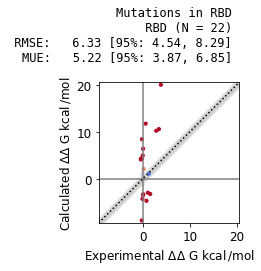

In [15]:
plotting.plot_DDGs(fe.graph,target_name='RBD', title='Mutations in RBD', units=r'$\mathrm{kcal\,/mol}$', filename='/data/chodera/zhangi/perses_benchmark/neq/15/arsenic_pilot_1_2_mmgbsa.png')
# added dpi to savefig() in local version
# removed "/" in labels in local version
# removed adding mbar error + other error and just use other error for error bars (in wrangle.py line 18)